In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
batch_size=16

training_datagenarator= ImageDataGenerator(rescale=1./255,horizontal_flip=True,
    vertical_flip=True,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2,validation_split=0.3)

In [3]:
train=training_datagenarator.flow_from_directory('E:/fire/train/',
                                                target_size=(224, 224),color_mode='rgb',
                                       class_mode='categorical', batch_size=batch_size,subset='training')

validation=training_datagenarator.flow_from_directory('E:/fire/test/',
                                                target_size=(224, 224),color_mode='rgb',
                                       class_mode='categorical', batch_size=batch_size,subset='validation')


   




Found 22679 images belonging to 3 classes.
Found 3150 images belonging to 3 classes.


In [4]:
# Initializing CNN
cnn=tf.keras.models.Sequential()

# adding first layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding second layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding third layer
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# Fully connected layer
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

# Output layers
cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

In [5]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 256)       147712    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0

In [24]:
checkpoint=tf.keras.callbacks.ModelCheckpoint('model/fire_and_smoke_model.h5',
                                             monitor='val_loss',mode="min",
                                             save_best_only=True)
callbacks=checkpoint



In [7]:

cnn.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

cnn.fit_generator(train,validation_data=validation,epochs=10,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=validation.samples//batch_size,
                  callbacks=callbacks 
                 )

E:\Users\user\anaconda3\envs\tf-new\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1417/1417 [==============================] - 2794s 2s/step - loss: 0.3552 - accuracy: 0.8784 - val_loss: 0.2512 - val_accuracy: 0.9238
Epoch 2/10
  20/1417 [..............................] - ETA: 30:42 - loss: 0.2437 - accuracy: 0.9031

KeyboardInterrupt: 

In [25]:
from tensorflow.keras.models import load_model
cnn=load_model('C:/Users/user/Desktop/fire-detect/model/Fire_and_Smoke_model.h5')

In [26]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [35]:
def detectImg(image_for_testing):
    test_image=image.load_img(image_for_testing,target_size=(224,224))
    test_image=image.img_to_array(test_image)
    test_image=test_image/255
    test_image=np.expand_dims(test_image,axis=0)
    pred = cnn.predict(test_image)
    return pred
    
    
    

In [40]:
label=['Smoke','Fire','Non Fire']

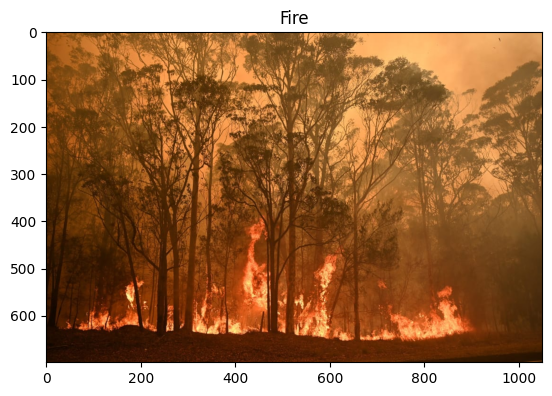

In [43]:
image_for_testing = 'image_for_testing/test-1.jpg'
pred = detectImg(image_for_testing)    
image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(label[int(pred.argmax())])
plt.show()

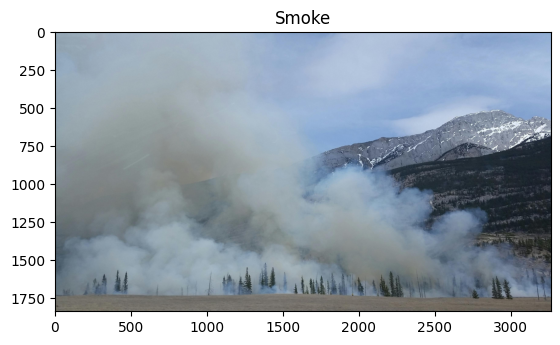

In [44]:
image_for_testing = 'image_for_testing/test-2.jpg'
pred = detectImg(image_for_testing)    
image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(label[int(pred.argmax())])
plt.show()

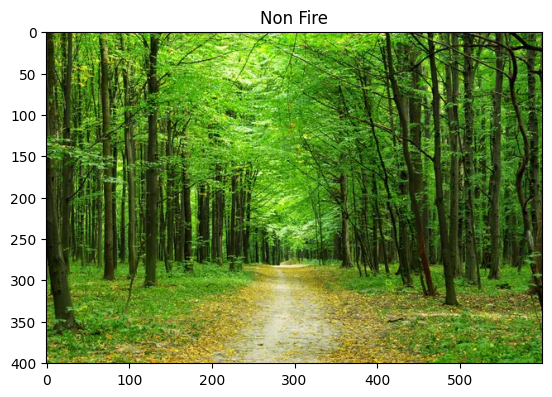

In [45]:
image_for_testing = 'image_for_testing/test-3.jpg'
pred = detectImg(image_for_testing)    
image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(label[int(pred.argmax())])
plt.show()